# BA_ZHAW_RTO

## Preprocessing

In [52]:
# imports
import os
import pandas as pd

In [59]:
# deleting the first column with time stamp
# because of its format its causing problems while concatenating

target_dir = "data/pump_lab"
file_names = os.listdir(target_dir)

for file in os.listdir(target_dir):
    file_path = os.path.join(target_dir, file)
    df = pd.read_csv(file_path, header = None)
    df = df.reset_index(drop=True)
    df = df.drop(df.columns[0], axis = 1)
    df.to_csv(file_path, index = False)



In [60]:
csv_file = "data/pump_lab/SPL_Messung_01.csv"
df = pd.read_csv(csv_file)
df.head()

,1,2,3,4,5,6,7,8,9,10,...,503,504,505,506,507,508,509,510,511,512
0,51.572996,55.137927,54.719515,63.838154,60.672167,61.006710,64.590305,59.248500,47.227367,57.569254,...,57.634014,54.087960,10.969100,35.679669,23.838154,54.184471,58.390457,60.528880,59.755754,46.788870
1,49.475342,55.223503,50.899334,62.075827,60.447594,56.035860,50.811330,62.682826,61.934431,51.392886,...,46.983442,41.180000,49.995851,45.552396,48.470325,53.841885,51.828482,44.773022,52.710524,51.621475
2,48.235557,49.898145,63.614196,66.359601,60.868880,62.655725,65.103456,60.951840,54.525600,58.419976,...,42.046761,50.244857,42.655725,45.017711,48.987361,56.045549,54.997043,40.394934,51.491590,46.732468
3,51.038311,51.717630,48.139844,56.954887,60.546199,59.031511,62.229224,62.605819,58.573325,57.127574,...,53.153920,50.431657,40.217060,49.475342,45.255695,47.490596,47.895842,49.160221,56.274893,52.061361
4,54.444477,59.980240,66.377303,62.803745,60.995764,64.075711,62.176799,63.338430,63.758830,53.167417,...,51.621475,48.400559,36.452257,43.309107,42.238722,39.466733,50.614525,52.851532,50.301320,53.287964


In [9]:
target_dir = "data/pump_lab"
file_names = os.listdir(target_dir)

dfs = []

for file in os.listdir(target_dir):
    file_path = os.path.join(target_dir, file)
    df = pd.read_csv(file_path)
    dfs.append(df)  # append all the dataframes to a list of dfs

merged_df = pd.concat(dfs)  # concatenate all the dataframes to one df

# add labels for the measurements
n_measurements = len(os.listdir(target_dir))
labels = [i for i in range(1, n_measurements + 1)]
print(labels)

merged_df['measurement'] = [labels[i//60] for i in range(len(merged_df))]

merged_df["pump"] = 0
merged_df = merged_df.reset_index(drop=True)
merged_df.loc[:420,'pump'] = 1
merged_df.loc[420:,'pump'] = 2

merged_df['valve'] = 0
merged_df.loc[:180, 'valve'] = 0.5
merged_df.loc[180:240, 'valve'] = 0.3
merged_df.loc[240:360, 'valve'] = 0.5
merged_df.loc[360:419, 'valve'] = 0.9

merged_df['rpm'] = 0
merged_df.loc[:60, 'rpm'] = 1000
merged_df.loc[60:300, 'rpm'] = 2000
merged_df.loc[300:360, 'rpm'] = 2500
merged_df.loc[360:420, 'rpm'] = 500
merged_df.loc[420:480, 'rpm'] = 2500
merged_df.loc[480:540, 'rpm'] = 2000
merged_df.loc[540:600, 'rpm'] = 1000
merged_df.loc[600:660, 'rpm'] = 500



# print(merged_df.head())
print(merged_df[:10])
# print(merged_df.columns)
merged_df.to_csv("preprocessed/SPL_measurements.csv", index=False)



[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
           1          2          3          4          5          6  \
0  51.572996  55.137927  54.719515  63.838154  60.672167  61.006710   
1  49.475342  55.223503  50.899334  62.075827  60.447594  56.035860   
2  48.235557  49.898145  63.614196  66.359601  60.868880  62.655725   
3  51.038311  51.717630  48.139844  56.954887  60.546199  59.031511   
4  54.444477  59.980240  66.377303  62.803745  60.995764  64.075711   
5  54.975164  60.779506  65.526429  65.279139  56.989700  61.690163   
6  25.932861  50.916828  54.148405  60.574989  67.328336  63.275473   
7  34.719515  49.350662  61.412766  63.417526  58.537058  63.932396   
8  45.776354  54.809292  42.923004  60.065997  45.552396  48.091589   
9  43.392626  53.829396  62.555624  67.598817  61.469996  63.462991   

           7          8          9         10  ...        507        508  \
0  64.590305  59.248500  47.227367  57.569254  ...  23.838154  54.184471   
1  50.811330  62.682826  61.93

In [206]:
# change csv data to np.array
import csv
import pandas as pd
pre_path = 'preprocessed/SPL_measurements.csv'
df = pd.read_csv(pre_path)

data = df.iloc[:, :-4].values
labels = df.iloc[:, -4].values
labels_pump = df.iloc[:, -3].values
labels_valve = df.iloc[:, -2].values
labels_rpm = df.iloc[:, -1].values

print(data)
print(labels)
print(labels_pump)
print(labels_valve)
print(labels_rpm)

print(type(data))
print(data.shape)
print(data.dtype)

print('length: ', len(data[0]))
print(data[60][:10])

[[51.57299584 55.13792726 54.71951455 ... 60.52887966 59.75575401
  46.78886963]
 [49.47534196 55.22350322 50.89933357 ... 44.77302173 52.71052425
  51.62147535]
 [48.23555733 49.89814543 63.61419566 ... 40.39493435 51.49159046
  46.73246755]
 ...
 [26.81693392 37.49581735 42.33313461 ... 55.80998492 46.70412857
  44.41105729]
 [40.68352866 47.56803405 43.47534915 ... 56.46149251 48.51652705
  55.48561996]
 [45.96382644 53.09971721 44.29945974 ... 54.70822684 46.50312381
  47.59369401]]
[ 1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  2  2  2  2  2  2  2  2  2  2  2  2
  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2
  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2
  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3
  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3 

# PCA
**First run code above _"change csv data to np.array"_ to initialize np.array.**

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.decomposition import PCA

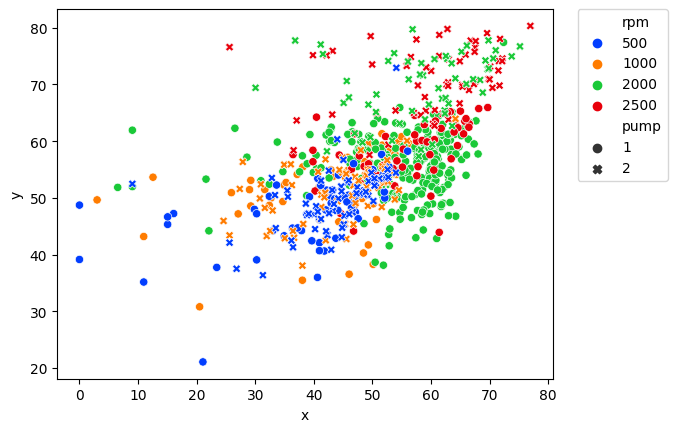

             0          1          2          3          4          5  \
0    51.572996  55.137927  54.719515  63.838154  60.672167  61.006710   
1    49.475342  55.223503  50.899334  62.075827  60.447594  56.035860   
2    48.235557  49.898145  63.614196  66.359601  60.868880  62.655725   
3    51.038311  51.717630  48.139844  56.954887  60.546199  59.031511   
4    54.444477  59.980240  66.377303  62.803745  60.995764  64.075711   
..         ...        ...        ...        ...        ...        ...   
655  43.434086  48.921642  45.994682  38.573325  49.030900  46.788870   
656  42.610367  47.280655  46.207657  45.454618  48.493457  57.785911   
657  26.816934  37.495817  42.333135  39.466733  34.136350  50.916828   
658  40.683529  47.568034  43.475349  42.143272  51.192047  55.588291   
659  45.963826  53.099717  44.299460  45.017711  35.780085  47.038242   

             6          7          8          9  ...        506        507  \
0    64.590305  59.248500  47.227367  57.5692

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

df_data = pd.DataFrame(data)

df_data['measurement'] = labels
df_data['valve'] = labels_valve
df_data['pump'] = labels_pump
df_data['rpm'] = labels_rpm

sns.scatterplot(data=df_data, x=data[:, 0], y=data[:, 1], hue='rpm', style='pump', palette='bright')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

print(df_data)

In [64]:
# NOTE: Nomalization for anomaly detection is typically done with the labeled dataset and not 
# with the full development dataset
# Sensor readings
data_n2, lb, ub = normalize_data(data, [], [], max_v=1.0, min_v=0.0)


print('')
print ("number of examples in the development subset = " + str(data_n2.shape[0]))
print ("data_n shape: " + str(data_n2.shape))
print(data_n2)


number of examples in the development subset = 660
data_n shape: (660, 512)
[[0.67015662 0.57504502 0.6016405  ... 0.907149   0.89020439 0.557553  ]
 [0.64289901 0.57648957 0.52534737 ... 0.45026567 0.71753351 0.68287724]
 [0.62678884 0.48659537 0.77927688 ... 0.32331129 0.68765877 0.55609032]
 ...
 [0.34846814 0.27723903 0.35427114 ... 0.770312   0.57032331 0.49588906]
 [0.52865527 0.44726214 0.3770824  ... 0.7892042  0.61474322 0.78308632]
 [0.59726921 0.5406392  0.39354078 ... 0.73836357 0.56539691 0.57842456]]


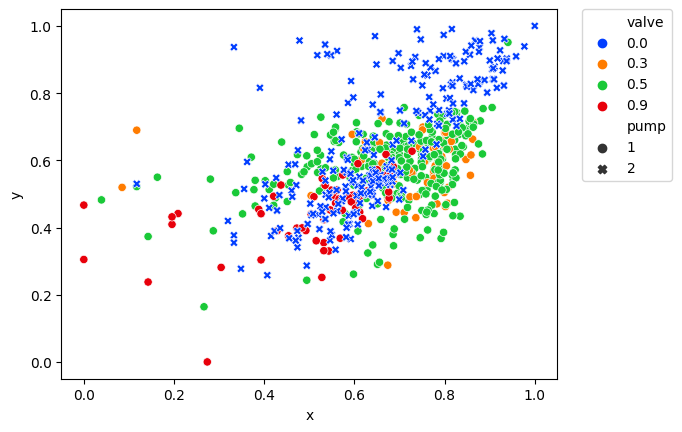

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

df_data_n2 = pd.DataFrame(data_n2)

df_data_n2['measurement'] = labels
df_data_n2['valve'] = labels_valve
df_data_n2['pump'] = labels_pump

sns.scatterplot(data=df_data_n2, x=data_n2[:, 0], y=data_n2[:, 1], hue='valve', style='pump', palette='bright')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel('x')
plt.ylabel('y')
plt.show()


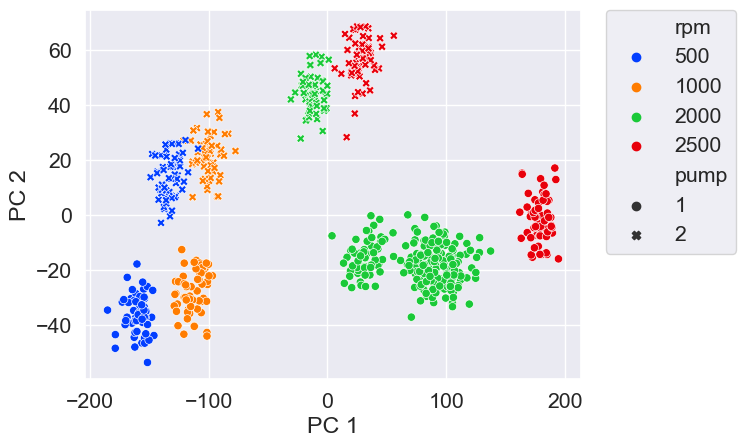

(660, 4)


In [112]:
# apply PCA

# substract the mean
X = data - data.mean(axis = 0)

# pca with 512 dim
pca = PCA(n_components = 4)

# project the data on the new dimension
projected = pca.fit_transform(X)

df_projected_before = pd.DataFrame(projected[:, :2], columns=['PC 1', 'PC 2'])

df_projected_before['measurement'] = labels
df_projected_before['valve'] = labels_valve
df_projected_before['pump'] = labels_pump
df_projected_before['rpm'] = labels_rpm

#plot - what can you observe from the plot?
# plt.scatter(projected[:, 0], projected[:, 1], c=labels , edgecolor='none', alpha=0.5)
sns.scatterplot(data=df_projected_before, x='PC 1', y='PC 2', hue='rpm', style='pump', palette='bright')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
# plt.colorbar()
plt.show()
print(np.shape(projected))

Explained variance ratio: [0.3471253  0.03136544 0.01672376 0.01536712]
Cumulative explained variance ratio: [0.3471253  0.37849074 0.39521449 0.41058161]


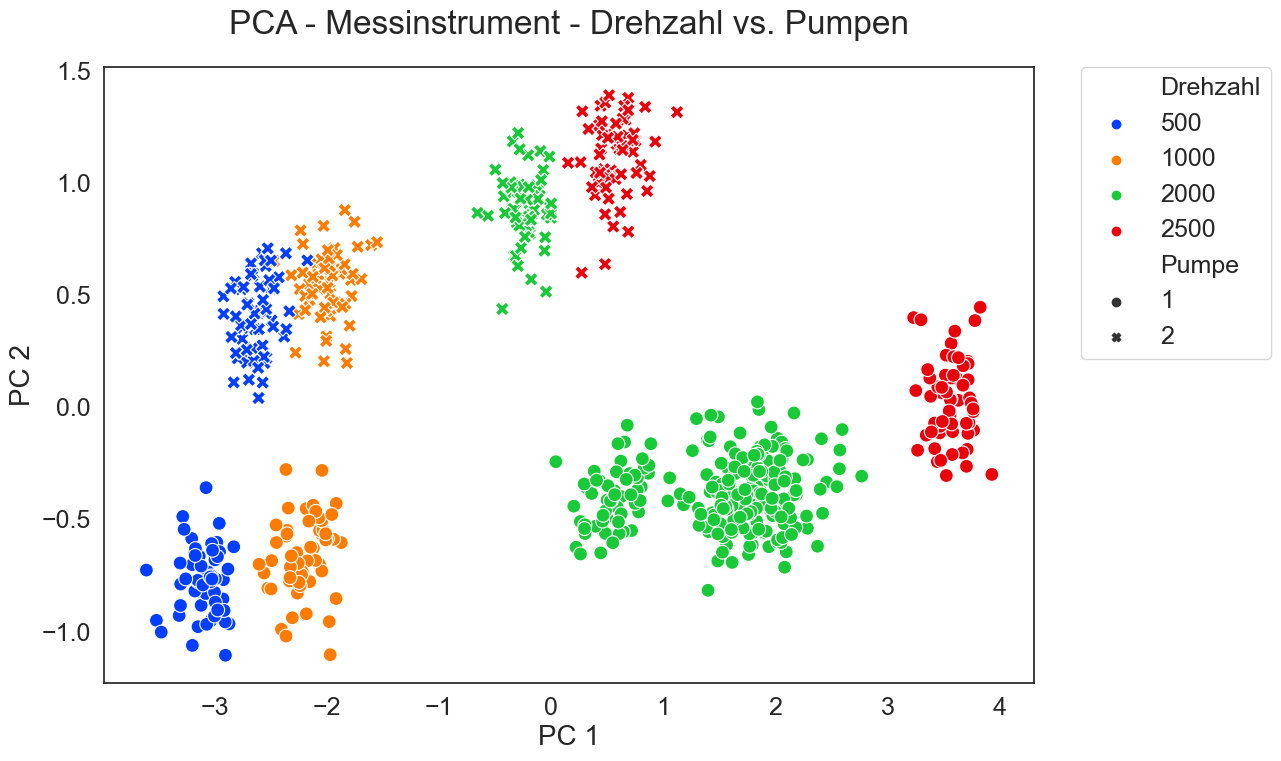

In [136]:
# apply PCA

# substract the mean
X = data_n2 - data_n2.mean(axis = 0)

# pca with 512 dim
pca = PCA(n_components = 4)

# project the data on the new dimension
projected = pca.fit_transform(X)

df_projected_before_2 = pd.DataFrame(projected[:, :2], columns=['PC 1', 'PC 2'])

df_projected_before_2['measurement'] = labels
df_projected_before_2['valve'] = labels_valve
df_projected_before_2['pump'] = labels_pump
df_projected_before_2['rpm'] = labels_rpm

# get explained variance ratio for each component
variance_ratio = pca.explained_variance_ratio_

# compute cumulative sum of explained variance
cumulative_var_ratio = np.cumsum(variance_ratio)

print(f"Explained variance ratio: {variance_ratio}")
print(f"Cumulative explained variance ratio: {cumulative_var_ratio}")

#plot - what can you observe from the plot?
# plt.scatter(projected[:, 0], projected[:, 1], c=labels , edgecolor='none', alpha=0.5)
plt.figure(figsize=(12, 8))
sns.set_style("white")
sns.scatterplot(data=df_projected_before_2, x='PC 1', y='PC 2', hue='rpm' , style='pump', palette='bright', s=100)

plt.title("PCA - Messinstrument - Drehzahl vs. Pumpen", fontsize=24, pad = 24)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize = 18)
plt.xlabel('PC 1', fontsize = 20)
plt.ylabel('PC 2', fontsize = 20)
plt.tick_params(axis="both", labelsize=18)

ax = plt.gca()
handles, labels = ax.get_legend_handles_labels()

# Replace 'pump' and 'rpm' in labels list with 'Pumpe' and 'Drehzahl' respectively
for i, label in enumerate(labels):
    if label == 'pump':
        labels[i] = 'Pumpe'
    elif label == 'rpm':
        labels[i] = 'Drehzahl'

# Remove the old legend, and then create a new one with the new labels
ax.legend_.remove()
plt.legend(handles, labels, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize = 18)

plt.savefig("./img/pca_measurement/pca_measurement_rpm_pump_before_AE.pdf", dpi=300, bbox_inches="tight")
plt.show()


In [16]:
import os
print(os.getcwd())

D:\9999_OneDrive_ZHAW\OneDrive - ZHAW\BA_ZHAW_RTO


In [193]:
df_projected_before_2

# sns.set(font_scale=1.4)
# sns.pairplot(df_projected_before_2)

,PC 1,PC 2,measurement,valve,pump,rpm
0,-1.976460,-0.957030,1,0.5,1,1000
1,-2.043135,-0.567615,1,0.5,1,1000
2,-1.868918,-0.604887,1,0.5,1,1000
3,-2.315539,-0.735492,1,0.5,1,1000
4,-2.062933,-0.550911,1,0.5,1,1000
...,...,...,...,...,...,...
655,-2.696680,0.462168,11,0.0,2,500
656,-2.852597,0.528257,11,0.0,2,500
657,-2.495588,0.651906,11,0.0,2,500
658,-2.569562,0.108637,11,0.0,2,500


Explained variance ratio: [0.3471253  0.03136544 0.01672376 0.01536712]
Cumulative explained variance ratio: [0.3471253  0.37849074 0.39521449 0.41058161]


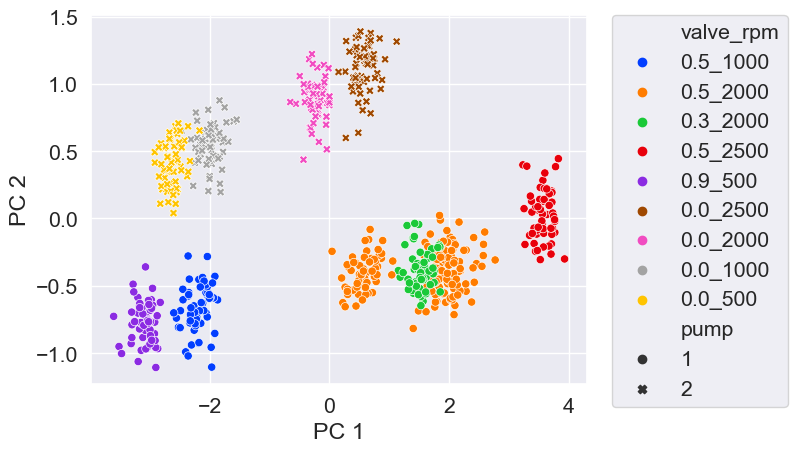

In [223]:
# apply PCA

# substract the mean
X = data_n2 - data_n2.mean(axis = 0)
df_X = pd.DataFrame(X)
# pca with x dim
pca = PCA(n_components = 4)

# project the data on the new dimension
projected = pca.fit_transform(X)

df_projected_before_2 = pd.DataFrame(projected[:, :2], columns=['PC 1', 'PC 2'])

df_projected_before_2['measurement'] = labels
df_projected_before_2['valve'] = labels_valve
df_projected_before_2['pump'] = labels_pump
df_projected_before_2['rpm'] = labels_rpm

df_projected_before_2['valve_rpm'] = df_projected_before_2['valve'].astype(str) + '_' + df_projected_before_2['rpm'].astype(str)


# get explained variance ratio for each component
variance_ratio = pca.explained_variance_ratio_

# compute cumulative sum of explained variance
cumulative_var_ratio = np.cumsum(variance_ratio)

print(f"Explained variance ratio: {variance_ratio}")
print(f"Cumulative explained variance ratio: {cumulative_var_ratio}")

#plot - what can you observe from the plot?
# plt.scatter(projected[:, 0], projected[:, 1], c=labels , edgecolor='none', alpha=0.5)
sns.scatterplot(data=df_projected_before_2, x='PC 1', y='PC 2', hue='valve_rpm' , style='pump', palette='bright')

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
# plt.colorbar()
plt.show()

In [110]:
# apply PCA

# substract the mean
X = data_n2 - data_n2.mean(axis = 0)
df_X = pd.DataFrame(X)
# pca with x dim
pca = PCA(n_components = 4)

# project the data on the new dimension
projected = pca.fit_transform(X)

df_projected_before_2 = pd.DataFrame(projected[:, :2], columns=['PC 1', 'PC 2'])

df_projected_before_2['measurement'] = labels
df_projected_before_2['valve'] = labels_valve
df_projected_before_2['pump'] = labels_pump
df_projected_before_2['rpm'] = labels_rpm

df_projected_before_2['mes_pump'] = df_projected_before_2['measurement'].astype(str) + '_' + df_projected_before_2['pump'].astype(str)

# get explained variance ratio for each component
variance_ratio = pca.explained_variance_ratio_

# compute cumulative sum of explained variance
cumulative_var_ratio = np.cumsum(variance_ratio)

print(f"Explained variance ratio: {variance_ratio}")
print(f"Cumulative explained variance ratio: {cumulative_var_ratio}")

#plot - what can you observe from the plot?
# plt.scatter(projected[:, 0], projected[:, 1], c=labels , edgecolor='none', alpha=0.5)
sns.scatterplot(data=df_projected_before_2, x='PC 1', y='PC 2', hue='mes_pump' , style='rpm', palette='bright')

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
# plt.colorbar()
plt.show()

ValueError: Length of values (8) does not match length of index (660)

## Interpretation & findings
The plot shows us all 11 measurements of our test data. Some measurements are close to each other, as maybe some specrtum are similar to each other.

PCs : [[ 0.03422973  0.0260313   0.06733849 ...  0.00685409  0.00038128
   0.00683819]
 [ 0.05312571  0.1227253  -0.02283846 ...  0.05093217  0.02734966
   0.04977108]
 [-0.06380094 -0.05598971 -0.20679162 ... -0.03397065 -0.02422584
  -0.02454355]
 [ 0.06731224  0.11553859  0.05629957 ... -0.0336707  -0.01049248
   0.00108342]]


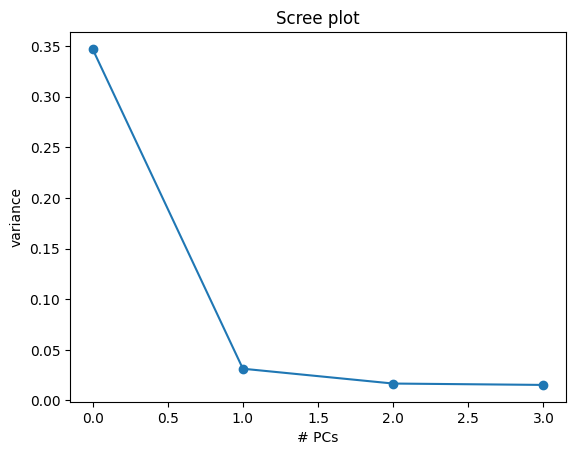

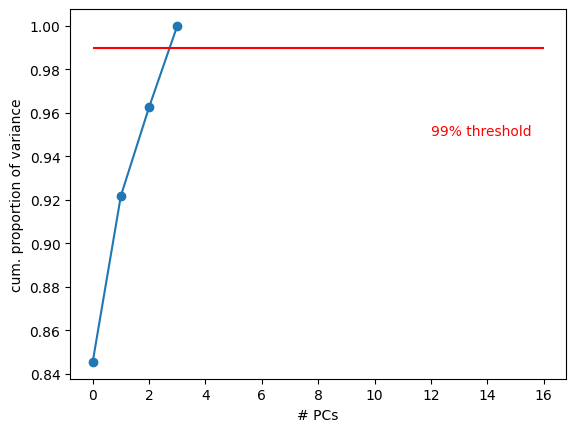

In [61]:
print('PCs :' ,pca.components_)
# print('Attributes :',labels)

# the amount of variance that each PC explains
var= pca.explained_variance_ratio_

# Scree Plot -- what does it say about the pcs?
plt.figure()
plt.plot(var, '-o')
plt.xlabel("# PCs")
plt.ylabel("variance")
plt.title("Scree plot")
plt.show()

plt.figure()
plt.plot(np.cumsum(var)/sum(var), '-o')
plt.hlines(y = 0.99, xmin = 0, xmax = 16, color = 'r')
# plt.text(12, 0.95, '99% threshold', color = 'r')
plt.xlabel("# PCs")
plt.ylabel("cum. proportion of variance")
plt.show()

## Interpretation & findings
The vectors are the eigenvalues of the dataset from pc 1 - 16. 

The screeplot shows to one that with about 14 PC's 99% of the data can be explained
and the variance tends to zero the more PC's are given.

## Plot raw data

[[43.14897066 51.81234144 57.28252469 ... 49.155415    1.
   1.        ]
 [52.6171643  56.99975525 67.3993193  ... 51.13374421  2.
   1.        ]
 [53.40589595 56.07759409 69.159703   ... 50.78852419  3.
   1.        ]
 ...
 [57.61883558 68.53975499 63.20766148 ... 54.17180012  9.
   2.        ]
 [43.33658253 50.84326651 53.25061782 ... 52.85769641 10.
   2.        ]
 [43.04459203 49.62968693 45.44097523 ... 50.90915751 11.
   2.        ]]


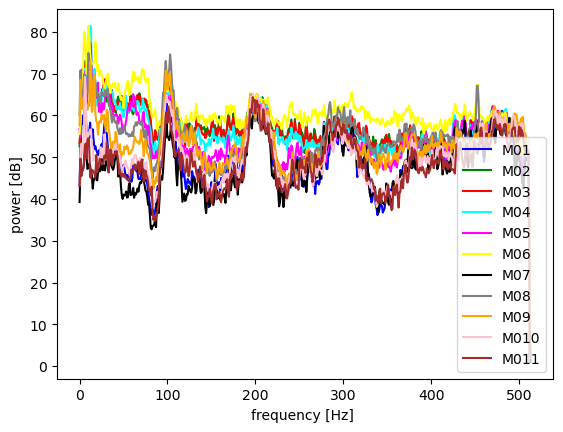

In [35]:
reshaped_data = data.reshape(-1, 60, 514)
avg_data = np.mean(reshaped_data, axis = 1)
print(avg_data)

# plt.plot(np.arange(len(avg_data[0])), avg_data[0])

num_classes = 11

# Plot all rows
colors = ['blue', 'green', 'red', 'cyan', 'magenta', 'yellow', 'black', 'gray', 'orange', 'pink', 'brown']
fig, ax = plt.subplots()

for i in range(11):
    ax.plot(avg_data[i], color=colors[i], label=f'M0{i+1}')

ax.set_xlabel('frequency [Hz] ')
ax.set_ylabel('power [dB]')
ax.legend()
plt.show()

## Packages ##

Let's first import all the packages that you will need during this assignment.
- [h5py](http://www.h5py.org) is a common package to interact with a dataset that is stored on an H5 file.
- [numpy](www.numpy.org) is the fundamental package for scientific computing with Python.
- [pandas](https://pandas.pydata.org/) is a software library written for Python for data manipulation and analysis.
- [sklearn](http://scikit-learn.org/stable/) provides simple and efficient tools for data mining and data analysis. 
- [seaborn](https://seaborn.pydata.org/) is another famous library to plot graphs in Python.
- [matplotlib](http://matplotlib.org) is a library for plotting graphs in Python.
- [tensorflow](https://www.tensorflow.org/) is a library for machine learning and artificial intelligence.
- In addition we provide various useful functions (i.e., auxiliary functions) used in this notebook.

In [63]:
import os
import h5py
import time
import random
import itertools
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt
from pandas import DataFrame
from itertools import product
from matplotlib import gridspec
from operator import itemgetter
from time import gmtime, strftime
from sklearn.model_selection import train_test_split

## Step 1.2: Normalizing data

A common technique we use in Machine Learning is to normalize our data. It often leads to a better performance because gradient descent converges faster after normalization. In this way, the provided dataset is normalized with a 'max-min' approach to values -1 to 1. While this is common in Machine Learning pipelines, we will renormalize to only positive values, i.e., 0 to 1.

We use the provided auxiliary function `normalize_data()` to renormalize the training and test datasets to only positive values, i.e., 0 to 1. Provide the resulting `np.array()` for all the variables: operative condition `W`, sensor readings `Xs`, and performance gap indicators `T`. We also create a plot to show that, indeed, the variables have been correctly normalized.


https://www.codecademy.com/article/normalization

In [12]:
def normalize_data(x, lb, ub, max_v=1.0, min_v=-1.0):
    '''
    Max-Min normalize of 'x' with max value 'max_v' min value 'min_v'
    '''

    # Set-up
    if len(ub)==0:
        ub = x.max(0) # OPTION 1
        # applied to the first dimension (0) columns of the data
        #ub = np.percentile(x, 99.9, axis=0, keepdims=True) # OPTION 2:
        
    if len(lb)==0:
        lb = x.min(0) 
        #lb = np.percentile(x, 0.1, axis=0, keepdims=True)
    
    ub.shape = (1,-1)
    lb.shape = (1,-1)           
    max_min = max_v - min_v
    delta = ub-lb

    # Compute
    x_n = max_min * (x - lb) / delta + min_v
    if 0 in delta:
        idx = np.ravel(delta == 0)
        x_n[:,idx] = x[:,idx] - lb[:, idx]

    return x_n, lb, ub 

In [141]:
# NOTE: Nomalization for anomaly detection is typically done with the labeled dataset and not 
# with the full development dataset
# Sensor readings
data_n, lb, ub = normalize_data(data, [], [], max_v=1.0, min_v=0.0)


print('')
print ("number of examples in the development subset = " + str(data_n.shape[0]))
print ("data_n shape: " + str(data_n.shape))

print(data)
print(data_n)


number of examples in the development subset = 660
data_n shape: (660, 512)
[[51.57299584 55.13792726 54.71951455 ... 60.52887966 59.75575401
  46.78886963]
 [49.47534196 55.22350322 50.89933357 ... 44.77302173 52.71052425
  51.62147535]
 [48.23555733 49.89814543 63.61419566 ... 40.39493435 51.49159046
  46.73246755]
 ...
 [26.81693392 37.49581735 42.33313461 ... 55.80998492 46.70412857
  44.41105729]
 [40.68352866 47.56803405 43.47534915 ... 56.46149251 48.51652705
  55.48561996]
 [45.96382644 53.09971721 44.29945974 ... 54.70822684 46.50312381
  47.59369401]]
[[0.67015662 0.57504502 0.6016405  ... 0.907149   0.89020439 0.557553  ]
 [0.64289901 0.57648957 0.52534737 ... 0.45026567 0.71753351 0.68287724]
 [0.62678884 0.48659537 0.77927688 ... 0.32331129 0.68765877 0.55609032]
 ...
 [0.34846814 0.27723903 0.35427114 ... 0.770312   0.57032331 0.49588906]
 [0.52865527 0.44726214 0.3770824  ... 0.7892042  0.61474322 0.78308632]
 [0.59726921 0.5406392  0.39354078 ... 0.73836357 0.56539691 

## Step 1.4: Generating training $\mathcal{S}_{T}$ and validation datasets $\mathcal{S}_{V}$

In [142]:
# Validation as subset of development data
indices = np.arange(data_n.shape[0])
idx_train, idx_val = train_test_split(indices, test_size=0.10, random_state=42, shuffle=True)

data_n_val = data_n[np.sort(idx_val)]
data_n_train = data_n[np.sort(idx_train)]
labels_n_val = labels[np.sort(idx_val)]
labels_n_train = labels[np.sort(idx_train)]

labels_pump_n_val = labels_pump[np.sort(idx_val)]
labels_pump_n_train = labels_pump[np.sort(idx_train)]
labels_valve_n_val = labels_valve[np.sort(idx_val)]
labels_valve_n_train = labels_valve[np.sort(idx_train)]
labels_rpm_n_val = labels_rpm[np.sort(idx_val)]
labels_rpm_n_train = labels_rpm[np.sort(idx_train)]


print(len(data_n_val))
print(len(data_n_train))
print(len(labels_n_val))
print(len(labels_n_train))
print(len(labels_pump_n_val))
print(len(labels_pump_n_train))
print(len(labels_valve_n_val))
print(len(labels_valve_n_train))
print(len(labels_rpm_n_val))
print(len(labels_rpm_n_train))

66
594
66
594
66
594
66
594
66
594


## Step 2.1: Create a model $\mathbf{\mathcal{G}}$ of the healthy system response i.e. $x_s^{(t)} \in \mathcal{D}_{L}$.

Given `X_{train, val, test}` and `Y_{train, val, test}` datasets, the code below allows the generation and optimization of symmetric and asymmetric autoencoder networks. The network architecture (or search space) is specified in the `config` dictionary. The optimization is carried out by grid search. Each configuration is run `n_runs` times. Each generated model is stored in `MODEL_PATH` as a `.h5` file.

The provided code contains four functions:
1. `create_encoder(input_shape, config)`
2. `create_decoder(input_shape, config)`
3. `create_autoencoder(input_shape, output_shape, config)`
4. `fit_model_ul(MODEL_PATH, X_{train, val, test}, Y_{train, val, test}, config)`
5. `grid_search_ul(MODEL_PATH, X_{train, val, test}, Y_{train, val, test}, config, n_runs)`

In [70]:
def create_encoder(input_shape, config):
    """
    Creates an encoder network with an architecture
    following a geometric series where each hidden layer 
    has half the number of neurons as the previous layer
    inputs:
        input_shape: tuple with input shape
        config: dictionary with nn configuration
    outputs:
        z: np.array with lantent space
        encoder: tf model        
    """ 
    
    # Architecture
    latent_dim = config['n_ls_a']  # latent space dim
    cells = [int(config['n_cl_a']*(0.5)**i) for i in range(config['n_hl_a'])]
    # geometric series where each hidden layer has half the number of neurons as 
    # the previous layer.

    # The variable config['n_cl_a'] is the initial number of channels, which halves 
    # for each hidden layer. The number of hidden layers is defined by 
    # config['n_hl_a'].

    # The for loop iterates over each hidden layer, and int(config['n_cl_a']*(0.5)**i) 
    # calculates the number of channels for that layer using the formula for 
    # a geometric series. The resulting cells list contains the number of 
    # channels for each hidden layer of the encoder network, from the first 
    # hidden layer to the last.
    
    # Define the inputs, input layer
    X_inputs = tf.keras.Input(shape=input_shape, name='encoder_input') 
    X = X_inputs
    
    # Encoding, going through the hidden layers (cells defined above)
    for i in range(config['n_hl_a']):
        X = tf.keras.layers.Dense(cells[i],
                                  activation=config['activ'],
                                  kernel_initializer=tf.keras.initializers.glorot_uniform(seed=config['seed']))(X)
    # https://www.tensorflow.org/api_docs/python/tf/keras/initializers/GlorotUniform
    # draws a uniform distributed sample with the seed to imitate a 
    # desterminisitc behavior. The layers are always applied on the previous layer X
        
    # Latent vector
    z = tf.keras.layers.Dense(latent_dim, name='z')(X)  
    # Dense layer with latent_dim number of neurons. Applies it to the the output
    # of the previous hidden layer X 
    # The output is the latent space representation of the input data.
    
    # Build encoder from 'X_inputs' to 'z' space
    encoder = tf.keras.Model(X_inputs, z, name='encoder')
    # Keras model that transforms the input data into the corresponding latent
    # representation. 
    
    # The seps before the encoder function are setting up the parameters and creating
    # a function to build the encoder network.
    
    # The encoder funciton takes an input shape and a dict of neural network parameters
    # as input and then creates an encoder network using the specified configuration.
    # The encoder network takes an input (x_inputs) and applies a sereis of fully
    #conntected (Dense) layers with the specified number of hidden layers and
    # neurons per layer, with activation function and weight initialization method.
    # the output of the final Dense layer is the latent representation z.
    
    # Return z and encoder allows access to the representation z and the encoder
    # network (encoder)
    
    return z, encoder

def create_decoder(output_shape, config):
    """
    inputs:
        input_shape: tuple with input shape
        config: dictionary with nn configuration
    outputs:
        outputs: np.array with reconstruction signal
        decoder: tf model        
    """
    
    # the decoder is like a inverse function of the encoder and does the same
    # backwards to create again the input data with the latent space
    # represantation. Afterwards we can compare the reconstruction with 
    # the original input.
    
    # Architecture
    latent_dim = config['n_ls_a']
    cells = [int(config['n_cl_a']*(0.5)**i) for i in range(config['n_hl_a'])]
    # n_cl_a initial number of channels, n_hl_a number of hidden layers
    
    # Define the inputs (from vector to time-dependent input)
    Z_inputs = tf.keras.Input(shape=(latent_dim,))
    X = Z_inputs
    
    # Dencoding      
    for i in reversed(range(config['n_hl_a'])):
        X = tf.keras.layers.Dense(cells[i],                                       
                                  activation=config['activ'],
                                  kernel_initializer=tf.keras.initializers.glorot_uniform(seed=config['seed']))(X)

    # Reconstructed input
    outputs = tf.keras.layers.Dense(output_shape[-1])(X)
    # output_shape is a tuple that represents the shape of the original 
    # input data. In this case, the shape of the last dimension is taken 
    # (i.e., output_shape[-1]) as the output dimension of the fully 
    # connected layer in the decoder, since each input is flattened to 
    # a 1D array before being fed into the network.
    
    # Build decoder model
    decoder = tf.keras.Model(Z_inputs, outputs, name='decoder')
    # rebuilds the input to the output
    
    return outputs, decoder

def create_autoencoder(input_shape, output_shape, config):
    """
    inputs:
        input_shape: tuple with input shape
        output_shape: tuple with output shape (in case it is an asymetric AE)
        config: dictionary with nn configuration
    outputs:
        autoencoder, encoder, decoder: tf models        
    """
    
    # Define the inputs
    X_inputs = tf.keras.Input(shape=input_shape) 
    # create input tensor
    
    # Create encoder
    z, encoder = create_encoder(input_shape, config) 
    # create latent space representation and encoder tf model
    
    # Create decoder
    outputs, decoder = create_decoder(output_shape, config)
    # create rebuilt output and decoder tf model
   
    # Create autoencoder
    X_hat = decoder(encoder(X_inputs))
    autoencoder = tf.keras.Model(X_inputs, X_hat, name='ae')    
    # create autoencoder model by feeding decoder with encoder model and 
    # encoder with the input data
    
    # Optimiser set-up
    opt = tf.keras.optimizers.legacy.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=True)
    # Adam optimizer from tf. 
    # lr: for gradient decent
    # beta1 and 2: for control decay rate of moving averages of the 
    # gradient decent and its square.
    # epslion: small constant added to the denominator to prevent 0 division
    # decay: learning rate decay to reduce lr over time (normally 0.0)
    # amsgrad: activate AMSGrad variant of the algorithm which is designed
    # to imporve convergence fo GD
    
    # Compilation
    autoencoder.compile(optimizer=opt, loss="mean_squared_error")
    # sets optimizer and loss function for the model before training
    # during the training the model uses it to update its weights
    #to minimize the loss.
    
    return autoencoder, encoder, decoder

def fit_model_ul(OUTFOLDER, 
                   X_train, Y_train, 
                   X_val, Y_val,
                   X_test, Y_test,
                   config, label, generate=True):
    """
    Creates and trains a NN with unsupervised learning strategy: 
    define model shapes, create model, fit model, plot training loss and save model
    inputs:
        OUTFOLDER: path to storage or model folder
        X_{train, val, test}: np.array with train, val and test input features.
        Y_{train, val, test}: np.array with train, val and test target features.
        config: dictionary with NN configuration (i.e. hyperparameters).
        label: str with model name for storage or loading
        generate_a: boolean with load or run.
    outputs:
        loss_val: np.array with loss in val dataset
        Y_hat_{train, val, test}: np.array with train, val and test output predictions.       
    """
    if generate:
        # Set-up I - 
        seed = config['seed']
        os.environ['PYTHONHASHSEED'] = '0'
        np.random.seed(seed)
        tf.keras.backend.clear_session()        
        # ensure reproducability of the results...
        
        # Set-up II - Shapes 
        input_shape = X_train.shape[1:]
        output_shape = Y_train.shape[1:]
        
        # Create autoencoder model
        autoencoder, encoder, decoder = create_autoencoder(input_shape, output_shape, config)
        
        # Callbacks
        early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=config['patience'], 
                                                      restore_best_weights = True)
        # how is this early stopping working? what is the patience parameter?
        # avoid overfitting, 
        
        # Report model summary
        autoencoder.summary()
        # Report model summary
        encoder.summary()
        
        # Fit model       
        history = autoencoder.fit(X_train, Y_train,
                                  batch_size=config['batch_size'], 
                                  epochs=config['epochs'], 
                                  callbacks=[early_stop],
                                  validation_data=(X_val, Y_val),
                                  verbose=0)   
        
        # Summarize history for loss
        plt.clf()
        plt.plot(history.history['loss'])
        plt.plot(history.history['val_loss'])
        plt.title('model loss')
        plt.ylabel('loss')
        plt.xlabel('epoch')
        plt.legend(['train', 'val'], loc='upper left')
        plt.show()

        # Save encoder model
        encoder.save(OUTFOLDER + 'model_E_' + str(label) + '.h5')
        print('')
        print("Saved Encoder model to disk")
        
        # Save auteoencoder model
        autoencoder.save(OUTFOLDER + 'model_AE_' + str(label) + '.h5')
        print('')
        print("Saved AutoEncoder model to disk")
        
        # Save decoder model
        decoder.save(OUTFOLDER + 'model_D_' + str(label) + '.h5')
        print('')
        print("Saved Decoder model to disk")     
        
    else:
        # Autoencoder
        autoencoder= tf.keras.models.load_model(OUTFOLDER + 'model_AE_' + str(label) + '.h5')
        print('')
        print("Loaded Autoencoder model from disk")
        
        # Report model summary
        autoencoder.summary()
        
        # Compilation
        autoencoder.compile(optimizer='Adam', loss="mean_squared_error") 
        
    # Evaluate model      
    loss_val = autoencoder.evaluate(x=X_val, y=Y_val)
    
    # Predict outputs
    Y_hat_train = autoencoder.predict(x=X_train)
    Y_hat_val = autoencoder.predict(x=X_val)
    Y_hat_test = autoencoder.predict(x=X_test)

    return loss_val, Y_hat_train, Y_hat_val, Y_hat_test

# 
def grid_search_ul(MODEL_PATH,
                   X_train, Y_train, 
                   X_val, Y_val,
                   X_test, Y_test, 
                   params, n_runs, varInput, generate=True):
    """
    Performs a grid search in a NN with unsupervised learning strategy: 
    define model shapes, create model, fit model, plot training loss and save model
    inputs:
        MODEL_PATH: path to storage or model folder.
        X_{train, val, test}: np.array with train, val and test input features.
        params: dictionary, NN possible configurations.
        n_runs: int, each configuration is performed n_runs times.
        varInput: str with mapping label.
        generate_a: boolean with load or run.
    outputs:
        df: storage dataframe.
        log_label: list of unique model labels.
    """
    # Set-up
    df = pd.DataFrame()
    log_loss_val, log_label, log_df = [], [], []
    keys, values = zip(*params.items())

    for kk, bundle in enumerate(product(*values)):        # Varing architectures
        
        # Architecture [kk]
        config = dict(zip(keys, bundle))

        for jj in range(n_runs):                         # Check reproducibility - n runs             
            df_k = pd.DataFrame(config, index=[0])
           
            # Define simulation label
            label =  varInput + '_h_a_' + str(kk) + '_run_' + str(jj)
            print('')
            print('Simulation:', label)

            # Fit NN model
            time_start = time.time()
            loss_val, Y_hat_train, Y_hat_val, Y_hat_test =\
            fit_model_ul(MODEL_PATH,
                           X_train, Y_train, 
                           X_val, Y_val,
                           X_test, Y_test,
                           config, label, generate=generate)
            
            # Store results
            log_loss_val.append(loss_val)
            log_label.append(label)

            # Log architecture/run/results as pandas DataFrame
            df_k['run']= jj
            df_k['RMSE-Ts'] = np.round(np.sqrt(np.mean((Y_hat_test - Y_test)**2)), 3)
            df_k['RMSE-Va'] = np.round(np.sqrt(np.mean((Y_hat_val - Y_val)**2)), 3)
            df_k['RMSE-Tr'] = np.round(np.sqrt(np.mean((Y_hat_train - Y_train)**2)), 3)
            df_k['Time[min]'] = np.round((time.time()-time_start)/60, 2)            
            log_df.append(df_k)
            df = pd.concat(log_df, ignore_index=True)

            print('')
            print(df.to_string())

            # Write solutions to 
            df.to_csv(MODEL_PATH + 'Training_US_' +  varInput + '.csv')

    return df, log_label, log_loss_val

**Define newtwork architecture**

In [207]:
# Network architecture
params = {"activ": ['relu'],      # Activation - h1 = ['tanh', 'relu']
          "n_hl_a": [4],          # Number of hidden layers - h2 = [1, 2, 3]
          "n_cl_a": [100],         # Initial number of channels (halves for each hidden layer) - h3 = [10, 20, 50]   
          "n_ls_a": [4],          # Latent space z dimensions - h5 = [6, 8, 10, 12, 14, 16, 18]  
          "batch_size": [128],    # Batch size autoencoder - h6 = [64, 128, 512, 1024]    
          "epochs": [200],         # Epochs - h7 (on demand)
          "seed": [229],          # Seed number
          "patience": [15]
           }

# Number of runs per NN architecture
n_runs = 5 

**Define the inputs and targets variables for training, validation and test i.e., `X_train`, `Y_train`,  `X_val`, `Y_val` `X_test` and `Y_test`.**

In [208]:
# Inputs
X_train = data_n_train
X_val = data_n_val
X_test = data_n_val

# Targets
Y_train = X_train
Y_val = X_val
Y_test = X_test

# Model tag 
input_s = 'Xs_Xs'      
target_s = 'Xs_Xs' 
var_input = input_s + '-' + target_s
var_names = list(df)[0:-1]


**Fit model according to the defined inputs and targets variables** 


Simulation: Xs_Xs-Xs_Xs_h_a_0_run_0
Model: "ae"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 512)]             0         
                                                                 
 encoder (Functional)        (None, 4)                 57989     
                                                                 
 decoder (Functional)        (None, 512)               58497     
                                                                 
Total params: 116,486
Trainable params: 116,486
Non-trainable params: 0
_________________________________________________________________
Model: "encoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 encoder_input (InputLayer)  [(None, 512)]             0         
                                                                 
 den

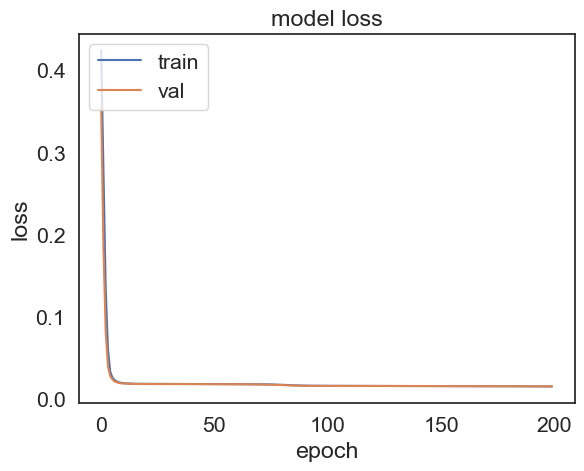


Saved Encoder model to disk

Saved AutoEncoder model to disk

Saved Decoder model to disk
3/3 [==============================] - 0s 2ms/step

  activ  n_hl_a  n_cl_a  n_ls_a  batch_size  epochs  seed  patience  run  RMSE-Ts  RMSE-Va  RMSE-Tr  Time[min]
0  relu       4     100       4         128     200   229        15    0    0.125    0.125    0.125        0.2

Simulation: Xs_Xs-Xs_Xs_h_a_0_run_1
Model: "ae"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 512)]             0         
                                                                 
 encoder (Functional)        (None, 4)                 57989     
                                                                 
 decoder (Functional)        (None, 512)               58497     
                                                                 
Total params: 116,486
Trainable params: 116,486
Non-traina

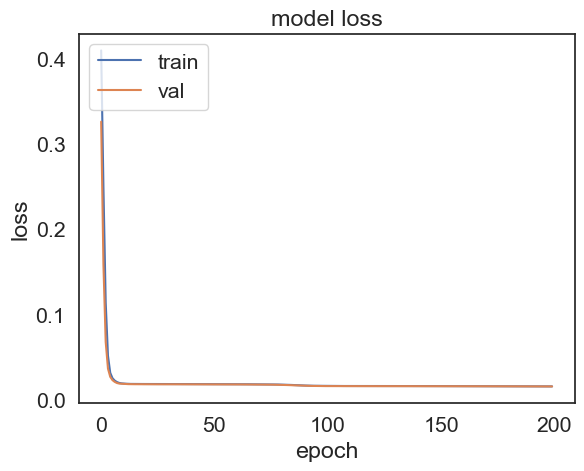


Saved Encoder model to disk

Saved AutoEncoder model to disk

Saved Decoder model to disk
3/3 [==============================] - 0s 2ms/step

  activ  n_hl_a  n_cl_a  n_ls_a  batch_size  epochs  seed  patience  run  RMSE-Ts  RMSE-Va  RMSE-Tr  Time[min]
0  relu       4     100       4         128     200   229        15    0    0.125    0.125    0.125       0.20
1  relu       4     100       4         128     200   229        15    1    0.126    0.126    0.126       0.18

Simulation: Xs_Xs-Xs_Xs_h_a_0_run_2
Model: "ae"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 512)]             0         
                                                                 
 encoder (Functional)        (None, 4)                 57989     
                                                                 
 decoder (Functional)        (None, 512)               58497     
             

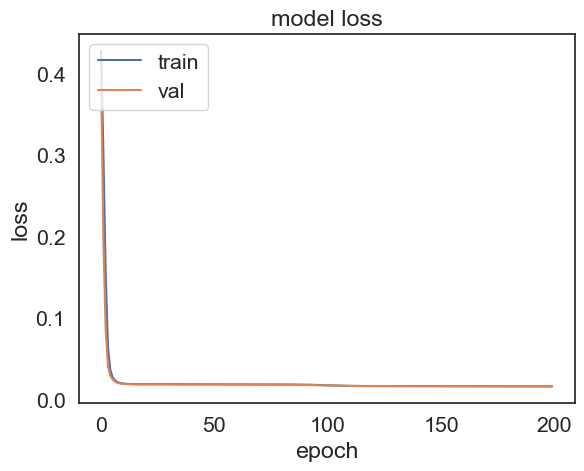


Saved Encoder model to disk

Saved AutoEncoder model to disk

Saved Decoder model to disk
3/3 [==============================] - 0s 2ms/step

  activ  n_hl_a  n_cl_a  n_ls_a  batch_size  epochs  seed  patience  run  RMSE-Ts  RMSE-Va  RMSE-Tr  Time[min]
0  relu       4     100       4         128     200   229        15    0    0.125    0.125    0.125       0.20
1  relu       4     100       4         128     200   229        15    1    0.126    0.126    0.126       0.18
2  relu       4     100       4         128     200   229        15    2    0.126    0.126    0.126       0.19

Simulation: Xs_Xs-Xs_Xs_h_a_0_run_3
Model: "ae"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 512)]             0         
                                                                 
 encoder (Functional)        (None, 4)                 57989     
                                  

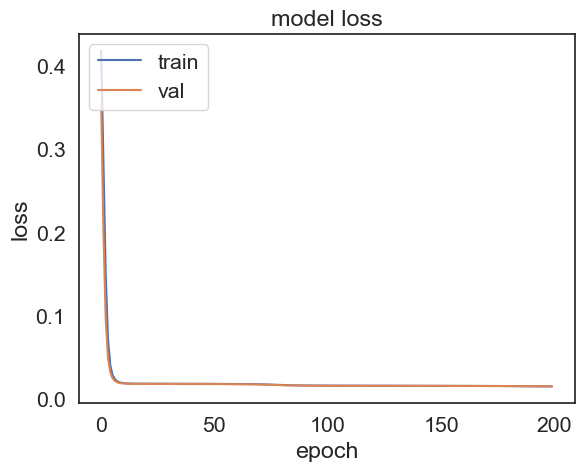


Saved Encoder model to disk

Saved AutoEncoder model to disk

Saved Decoder model to disk
3/3 [==============================] - 0s 2ms/step

  activ  n_hl_a  n_cl_a  n_ls_a  batch_size  epochs  seed  patience  run  RMSE-Ts  RMSE-Va  RMSE-Tr  Time[min]
0  relu       4     100       4         128     200   229        15    0    0.125    0.125    0.125       0.20
1  relu       4     100       4         128     200   229        15    1    0.126    0.126    0.126       0.18
2  relu       4     100       4         128     200   229        15    2    0.126    0.126    0.126       0.19
3  relu       4     100       4         128     200   229        15    3    0.124    0.124    0.124       0.20

Simulation: Xs_Xs-Xs_Xs_h_a_0_run_4
Model: "ae"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 512)]             0         
                                                       

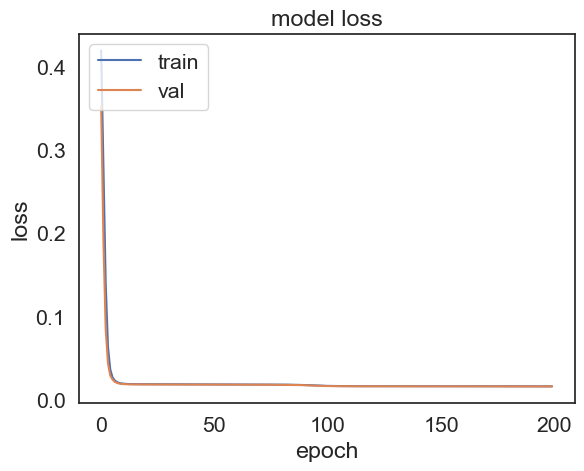


Saved Encoder model to disk

Saved AutoEncoder model to disk

Saved Decoder model to disk
3/3 [==============================] - 0s 1ms/step

  activ  n_hl_a  n_cl_a  n_ls_a  batch_size  epochs  seed  patience  run  RMSE-Ts  RMSE-Va  RMSE-Tr  Time[min]
0  relu       4     100       4         128     200   229        15    0    0.125    0.125    0.125       0.20
1  relu       4     100       4         128     200   229        15    1    0.126    0.126    0.126       0.18
2  relu       4     100       4         128     200   229        15    2    0.126    0.126    0.126       0.19
3  relu       4     100       4         128     200   229        15    3    0.124    0.124    0.124       0.20
4  relu       4     100       4         128     200   229        15    4    0.126    0.126    0.127       0.18


In [209]:
# Working folder: storage
ROOT_PATH_2 = 'models/01-AE-MLP'
MODEL_PATH_2 = ROOT_PATH_2  + '/' + strftime("%Y-%m-%d", gmtime()) + '/'
if not os.path.exists(MODEL_PATH_2):
    os.makedirs(MODEL_PATH_2)

# Fit model
df, log_label_2, log_loss_val = grid_search_ul(MODEL_PATH_2,
                                X_train, Y_train, 
                                X_val, Y_val,
                                X_test, Y_test,
                                params, n_runs, var_input, 
                                generate=True)

In [210]:
# Select model with best loss on validation set!!
log_loss_val = np.array(log_loss_val)
mask = np.ravel(log_loss_val==min(log_loss_val))
label = list(itertools.compress(log_label_2, mask))[0]
print(label)

model = tf.keras.models.load_model(MODEL_PATH_2 + 'model_AE_' + str(label) + '.h5')
Y_hat_train = model.predict(x=X_train)
Y_hat_val = model.predict(x=X_val)
Y_hat_test = model.predict(x=X_test)

Xs_Xs-Xs_Xs_h_a_0_run_3
3/3 [==============================] - 0s 2ms/step


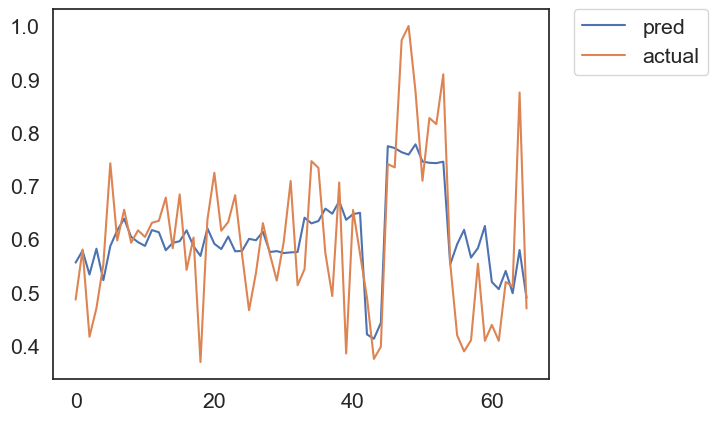

In [211]:
plt.plot(Y_hat_val[:,1], label = "pred")
plt.plot(X_val[:,1], label = "actual")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)


In [212]:
# Select model with best loss on validation set!!
log_loss_val = np.array(log_loss_val)
mask = np.ravel(log_loss_val==min(log_loss_val))
label = list(itertools.compress(log_label_2, mask))[0]
print(label)

model = tf.keras.models.load_model(MODEL_PATH_2 + 'model_E_' + str(label) + '.h5')
Z_hat_train = model.predict(x=X_train)
Z_hat_val = model.predict(x=X_val)
Z_hat_test = model.predict(x=X_test)

Xs_Xs-Xs_Xs_h_a_0_run_3
3/3 [==============================] - 0s 2ms/step


In [213]:
# latent space dimension of the encoder
df_Z_train = pd.DataFrame(Z_hat_train)
df_Z_train

,0,1,2,3
0,1.437038,-1.774032,1.207675,3.196564
1,1.562425,-1.584552,1.315220,3.271755
2,1.440098,-1.619194,1.337594,3.145757
3,1.572536,-1.598919,1.358932,3.255287
4,1.497128,-1.657622,1.298412,3.167287
...,...,...,...,...
589,1.664341,-0.868489,1.410975,3.897654
590,1.642653,-0.652924,1.473199,3.803012
591,1.774134,-0.662530,1.460907,3.891990
592,1.606891,-0.911560,1.389188,3.749299


In [214]:
df_labels = pd.DataFrame(labels_n_train)
df_labels

,0
0,1
1,1
2,1
3,1
4,1
...,...
589,11
590,11
591,11
592,11


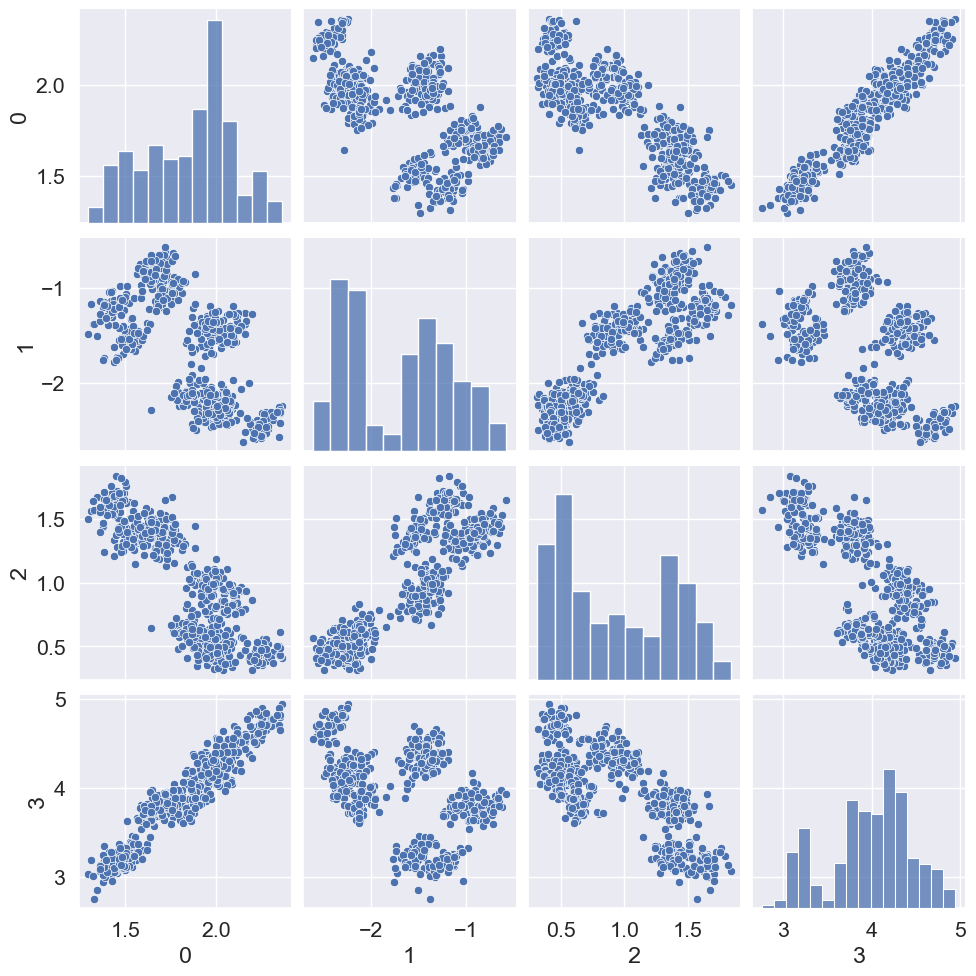

In [215]:
# Plot
sns.set(font_scale=1.4)
sns.pairplot(df_Z_train)

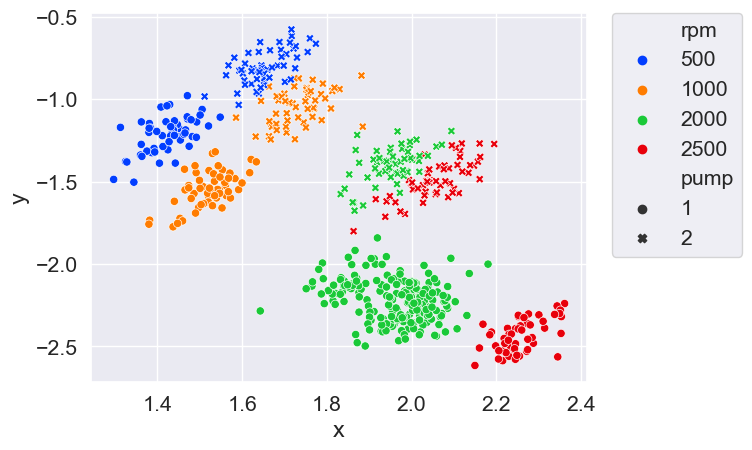

In [216]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

df_Z_train['measurement'] = labels_n_train
df_Z_train['valve'] = labels_valve_n_train
df_Z_train['pump'] = labels_pump_n_train
df_Z_train['rpm'] = labels_rpm_n_train

sns.scatterplot(data=df_Z_train, x=Z_hat_train[:, 0], y=Z_hat_train[:, 1], hue='rpm', style='pump', palette='bright')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel('x')
plt.ylabel('y')
plt.show()


In [217]:
# %%capture

# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
# %matplotlib inline
# from sklearn.decomposition import PCA

# data_hat = df_Z_train
# print(len(data_hat))
# print(len(df_labels))

# # perform scatterplot
# #plt.scatter(data_hat, df_labels)

# # apply PCA

# # substract the mean
# X = data - data.mean(axis = 0)

# # pca with 512 dim
# pca = PCA(n_components = 16)

# # project the data on the new dimension
# projected = pca.fit_transform(X)

# #plot - what can you observe from the plot?
# plt.scatter(projected[:, 0], projected[:, 1], c=labels , edgecolor='none', alpha=0.5)
# plt.xlabel('PC 1')
# plt.ylabel('PC 2')
# plt.colorbar()
# plt.show()

594
594


<Figure size 640x480 with 0 Axes>

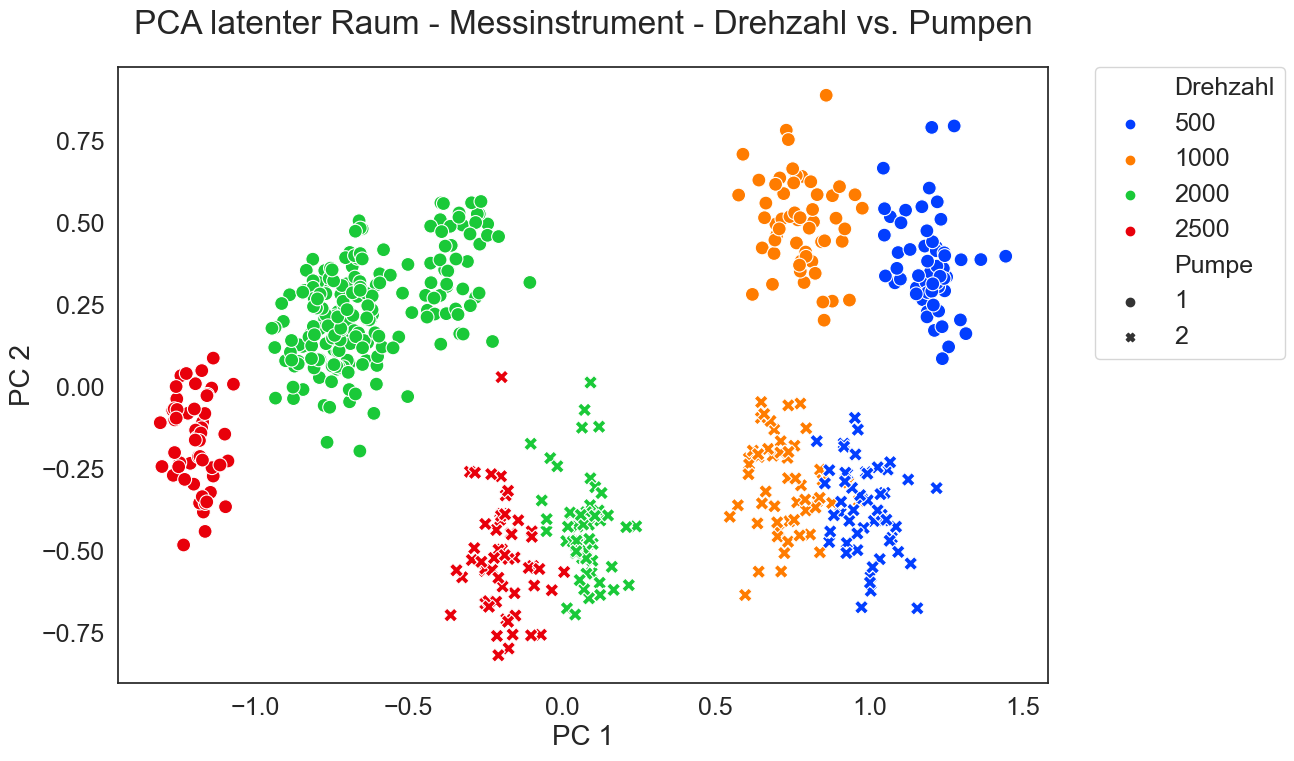

In [221]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.decomposition import PCA

data_hat = Z_hat_train
print(len(data_hat))
print(len(df_labels))

# apply PCA

# substract the mean
X = data_hat - data_hat.mean(axis = 0)

# pca with 512 dim
pca = PCA(n_components = 2)

# project the data on the new dimension
projected = pca.fit_transform(X)

# create a dataframe for the projected data
df_projected_latent = pd.DataFrame(projected[:, :2], columns=['PC 1', 'PC 2'])


# add the labels to the dataframe
df_projected_latent['measurement'] = labels_n_train
df_projected_latent['valve'] = labels_valve_n_train
df_projected_latent['pump'] = labels_pump_n_train
df_projected_latent['rpm'] = labels_rpm_n_train

df_projected_before_2['mes_pump'] = df_projected_before_2['measurement'].astype(str) + '_' + df_projected_before_2['pump'].astype(str)
df_projected_before_2['valve_rpm'] = df_projected_before_2['valve'].astype(str) + '_' + df_projected_before_2['rpm'].astype(str)


# plot the data using seaborn
plt.clf()
plt.figure(figsize=(12,8))
sns.set_style("white")
sns.scatterplot(data=df_projected_latent, x='PC 1', y='PC 2', hue='rpm', style='pump', palette='bright', s=100)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.title("PCA latenter Raum - Messinstrument - Drehzahl vs. Pumpen", fontsize=24, pad = 24)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize = 18)
plt.xlabel('PC 1', fontsize = 20)
plt.ylabel('PC 2', fontsize = 20)
plt.tick_params(axis="both", labelsize=18)

ax = plt.gca()
handles, labels = ax.get_legend_handles_labels()

# Replace 'pump' and 'rpm' in labels list with 'Pumpe' and 'Drehzahl' respectively
for i, label in enumerate(labels):
    if label == 'pump':
        labels[i] = 'Pumpe'
    elif label == 'rpm':
        labels[i] = 'Drehzahl'

# Remove the old legend, and then create a new one with the new labels
ax.legend_.remove()
plt.legend(handles, labels, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize = 18)

plt.savefig("./img/pca_measurement/pca_measurement_rpm_pump_after_AE.pdf", dpi=300, bbox_inches="tight")
plt.show()
